http://web.stanford.edu/class/cs224n/assignment2/assignment2-soln.pdf

In [1]:
from IPython.display import Image

It's the same equations from the question, but with dimensions labeled under each variable.

\begin{align*}
\underset{1 \times d}{e^{(t)}} &=  \underset{1 \times \left | V \right |,}{x^{(t)}} \underset{\left |V \right | \times d}{L} \\
\underset{1 \times D_h}{h^{(t)}} &= \mathrm{sigmoid}(\underset{1 \times D_h}{z_1^{(t)}}) = \mathrm{sigmoid}\bigg( \underset{1 \times D_h,}{h^{(t - 1)}} \underset{D_h \times D_h}{H} + \underset{1\times d,}{e^{(t)}} \underset{d \times D_h}{I} + \underset{1 \times D_h}{b_1} \bigg) \\
\underset{1 \times \left|V\right|}{\hat y^{(t)}} &= \mathrm{softmax}(\underset{1 \times \left|V\right|}{z_2^{(t)}}) = \mathrm{softmax}\bigg( \underset{1 \times D_h,}{h^{(t)}} \underset{D_h \times \left| V \right |}{U} + \underset{1 \times \left| V \right|}{b_2} \bigg) \\
J^{(t)} &= CE(y^{(t)}, \hat{y}^{(t)}) = \sum_{j=1}^{\left|V\right|}y_j^{(t)}\mathrm{log}(\hat{y}_j^{(t)})
\end{align*}

* $L$: the embedding matrix. The matrix of $d$-dimension word embedding vectors for all $\left|V\right|$ words in the vocabulary.
* $I$: the input word representation matrix.
* $H$: the hidden transformation matrix.
* $U$: the output word representation matrix.

I also added intermeidate variables $z_1$ and $z_2$.

Put all the variables in an RNN diagram

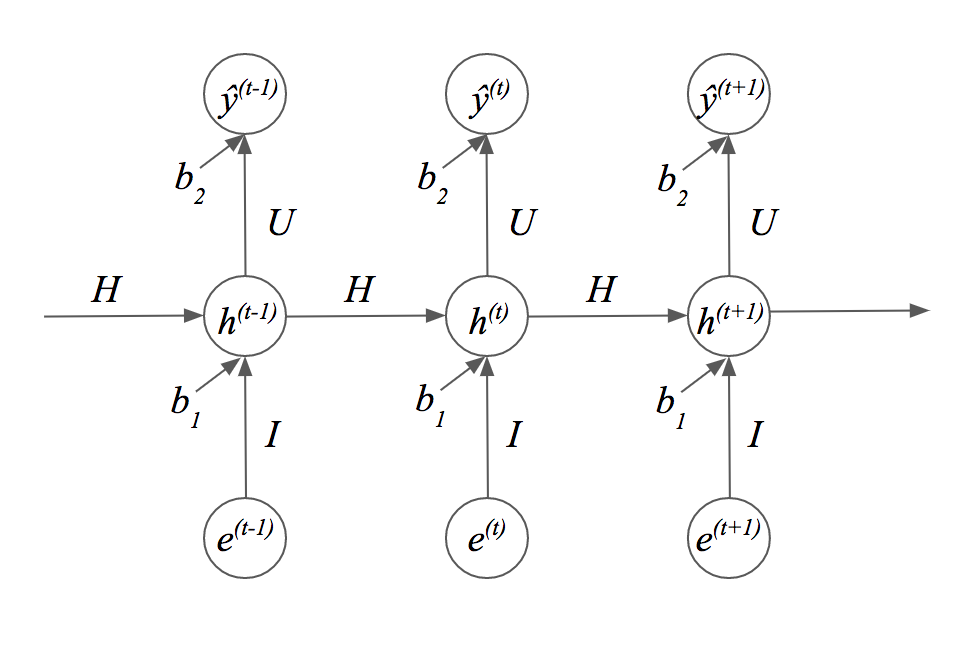

In [7]:
# https://docs.google.com/presentation/d/1bqkPbAxRE1GrDLivT1HoNK0U1EtQJW1Bnqfm8zgpAfY/edit#slide=id.g2aa6e73fd4_0_5 (private link)
Image('./RNN.png', width=500)

# (a)

Cross-entropy:

\begin{align*}
J^{(t)}(\theta)
&= - \sum_{j=1}^{\left|V\right|} y_j^{(t)} \mathrm{log}( \hat{y}_j^{(t)}) \\
&= - 1\{j=k\} y_j^{(t)} \mathrm{log}(\hat{y}_j^{(t)}) \\
&= - \mathrm{log}(\hat{y}_k^{(t)}) \\
&= \mathrm{log}\frac{1}{\hat{y}_k^{(t)}}
\end{align*}

where the $k$th element of one-hot vector $y^{(t)}$ is one.

Perplexity:

\begin{align*}
PP^{(t)}
&= \frac{1}{\sum_{j=1}^{\left|V\right|} y_j^{(t)} \hat{y}_j^{(t)}} \\
&= \frac{1}{1\{j = k\} y_j^{(t)} \hat{y}_j^{(t)}} \\
&= \frac{1}{\hat{y}_k^{(t)}} \\
&= \mathrm{exp}({J^{(t)}})
\end{align*}

# (b)

Just copied equations from above:

\begin{align*}
\underset{1 \times d}{e^{(t)}} &=  \underset{1 \times \left | V \right |,}{x^{(t)}} \underset{\left |V \right | \times d}{L} \\
\underset{1 \times D_h}{h^{(t)}} &= \mathrm{sigmoid}(\underset{1 \times D_h}{z_1^{(t)}}) = \mathrm{sigmoid}\bigg( \underset{1 \times D_h,}{h^{(t - 1)}} \underset{D_h \times D_h}{H} + \underset{1\times d,}{e^{(t)}} \underset{d \times D_h}{I} + \underset{1 \times D_h}{b_1} \bigg) \\
\underset{1 \times \left|V\right|}{\hat y^{(t)}} &= \mathrm{softmax}(\underset{1 \times \left|V\right|}{z_2^{(t)}}) = \mathrm{softmax}\bigg( \underset{1 \times D_h,}{h^{(t)}} \underset{D_h \times \left| V \right |}{U} + \underset{1 \times \left| V \right|}{b_2} \bigg) \\
J^{(t)} &= CE(y^{(t)}, \hat{y}^{(t)}) = \sum_{j=1}^{\left|V\right|}y_j^{(t)}\mathrm{log}(\hat{y}_j^{(t)})
\end{align*}

\begin{align*}
\underset{1\times D_h}{\frac{\partial J^{(t)}}{\partial b_2}} 
= \underset{1 \times \left|V\right|}{\frac{\partial J^{(t)}}{\partial z_2^{(t)}}} \underset{\left|V\right| \times \left|V\right|}{\frac{\partial z_2^{(t)}}{\partial b_2}} 
= \underset{1 \times \left|V\right|}{\hat{y}^{(t)} - y^{(t)}}
\end{align*}

**Note**: $\frac{\partial z_2^{(t)}}{\partial b_2}$ is an identity matrix, and $\frac{\partial J^{(t)}}{\partial z_2^{(t)}}$ has been derived before in Assignment 1.

\begin{align*}
\underset{1\times d}{\frac{\partial J^{(t)}}{\partial L_x^{(t)}}} 
&= \underset{1\times d}{\frac{\partial J^{(t)}}{\partial e^{(t)}}} 
\\
&= \underset{1 \times \left|V\right|,}{\frac{\partial J^{(t)}}{\partial z_2^{(t)}}}    
  \underset{\left|V\right| \times D_h,}{\frac{\partial z_2^{(t)}}{\partial h^{(t)}}} 
  \underset{D_h \times D_h,}{\frac{\partial h^{(t)}}{\partial z_1^{(t)}}}
  \underset{D_h \times d}{\frac{\partial z_1^{(t)}}{\partial e^{(t)}}}
\\
&= \underset{1 \times \left|V\right|,}{(\hat{y}^{(t)} - y^{(t)})} \underset{\left|V\right| \times D_h,}{U^T} \underset{D_h \times D_h,}{diag\{h^{(t)} \circ (1 - h^{(t)})\}} \underset{D_h \times d}{I^T}
\end{align*}

Now let's set

\begin{align*}
\delta_2^{(t)} &= \underset{1 \times \left|V\right|}{\frac{\partial J^{(t)}}{\partial z_2^{(t)}}} = \underset{1 \times \left|V\right|}{\hat{y}^{(t)} - y^{(t)}} \\
\delta_1^{(t)} &= \underset{1\times D_h}{\frac{\partial J^{(t)}}{\partial z_1^{(t)}}} 
= \underset{1 \times \left|V\right|,}{\delta_2^{(t)}} \underset{\left|V\right| \times D_h,}{U^T} \underset{D_h \times D_h,}{diag\{h^{(t)} \circ (1 - h^{(t)})\}}
\end{align*}

**Note**: the labels of $\delta$s are reversed compared to the solution because I tried to make them consistent with $z_1$ and $z_2$. Otherwise, I find it very confusing.

Then 

\begin{align*}
\underset{d \times D_h}{\frac{\partial J^{(t)}}{\partial I}\bigg|_t} 
&= \underset{1 \times D_h,}{\delta_1^{(t)}} \underset{D_h \times d \times D_h}{\frac{\partial z_1^{(t)}}{\partial I}} = \underset{d \times 1}{(e^{(t)})^T} \underset{1 \times D_h}{\delta_1^{(t)}} \\
\underset{D_h \times D_h}{\frac{\partial J^{(t)}}{\partial H}\bigg|_t} 
&= \underset{1 \times D_h,}{\delta_1^{(t)}} \underset{D_h \times D_h \times D_h}{\frac{\partial z_1^{(t)}}{\partial H}} = \underset{D_h \times 1}{(h^{(t - 1)})^T} \underset{1 \times D_h}{\delta_1^{(t)}}
\\
\underset{1 \times D_h}{\frac{\partial J^{(t)}}{\partial h^{(t-1)}}} 
&= \underset{1 \times D_h}{\delta_1^{(t)}} \underset{D_h \times D_h}{H^T}
\end{align*}

**Note**: $\frac{\partial z_1^{(t)}}{\partial I}$ and $\frac{\partial z_1^{(t)}}{\partial H}$ are thrid-order tensors. I am not very familiar with tensor calculus. The result is partially derived from the following simple case:

Given 

\begin{align*}
J &= f(\underset{1 \times m,}{x} \underset{m \times n,}{W}) \\
  &= \underset{1 \times m,}{x} \underset{m \times n,}{W} \underset{n \times 1}{y^T} \\
  &= \underset{1 \times n}{z} \underset{n \times 1}{y^T}
\end{align*}

where $x$ and $y$ are row vectors, then

\begin{align*}
\underset{m \times n}{\frac{\partial J}{\partial W}}
&= \underset{1 \times n,}{\frac{\partial J}{\partial z}} \underset{n \times m \times n}{\frac{\partial z}{\partial W}} \\
&= \underset{m \times 1}{x^T} \underset{1 \times n}{y} \\
\end{align*}

The last equality is derived element-wise as $J = \sum_{i}^{m} \sum_{j}^{n} x_i W_{ij} y_j$.

# (c)

Just copied equations from above:

\begin{align*}
\underset{1 \times d}{e^{(t)}} &=  \underset{1 \times \left | V \right |,}{x^{(t)}} \underset{\left |V \right | \times d}{L} \\
\underset{1 \times D_h}{h^{(t)}} &= \mathrm{sigmoid}(\underset{1 \times D_h}{z_1^{(t)}}) = \mathrm{sigmoid}\bigg( \underset{1 \times D_h,}{h^{(t - 1)}} \underset{D_h \times D_h}{H} + \underset{1\times d,}{e^{(t)}} \underset{d \times D_h}{I} + \underset{1 \times D_h}{b_1} \bigg) \\
\underset{1 \times \left|V\right|}{\hat y^{(t)}} &= \mathrm{softmax}(\underset{1 \times \left|V\right|}{z_2^{(t)}}) = \mathrm{softmax}\bigg( \underset{1 \times D_h,}{h^{(t)}} \underset{D_h \times \left| V \right |}{U} + \underset{1 \times \left| V \right|}{b_2} \bigg) \\
J^{(t)} &= CE(y^{(t)}, \hat{y}^{(t)}) = \sum_{j=1}^{\left|V\right|}y_j^{(t)}\mathrm{log}(\hat{y}_j^{(t)})
\end{align*}

For clarity, let's set $\underset{D_h \times D_H}{\sigma'^{(t-1)}} = {diag\{h^{(t-1)} \circ (1 - h^{(t-1)})\}}$

\begin{align*}
\underset{1\times d}{\frac{\partial J^{(t)}}{\partial L_x^{(t-1)}}} 
= \underset{1\times d}{\frac{\partial J^{(t)}}{\partial e^{(t-1)}}} 
&= \bigg( \underset{1 \times D_h,}{\frac{\partial J^{(t)}}{\partial h^{(t-1)}}}    
  \underset{D_h \times D_h}{\frac{\partial h^{(t-1)}}{\partial z_1^{(t-1)}}} \bigg)
  \underset{D_h \times d}{\frac{\partial z_1^{(t-1)}}{\partial e^{(t-1)}}} 
= \bigg( \underset{1 \times D_h}{\sigma_1^{(t)} H^T} \underset{D_h \times D_h}{\sigma'^{(t-1)}} \bigg) \underset{D_h \times d}{I^T}
\\
\underset{d\times D_h}{\frac{\partial J^{(t)}}{\partial I}}\bigg|_{(t-1)}
&= \bigg( \underset{1 \times D_h,}{\frac{\partial J^{(t)}}{\partial h^{(t-1)}}}    
  \underset{D_h \times D_h}{\frac{\partial h^{(t-1)}}{\partial z_1^{(t-1)}}} \bigg)
  \underset{D_h \times d \times D_h}{\frac{\partial z_1^{(t-1)}}{\partial I}} 
= \underset{d \times 1}{(e^{(t-1)})^T} \bigg( \underset{1 \times D_h}{\sigma_1^{(t)} H^T} \underset{D_h \times D_h}{\sigma'^{(t-1)}} \bigg)
\\
\underset{D_h \times D_h}{\frac{\partial J^{(t)}}{\partial H}}\bigg|_{(t-1)}
&= \bigg( \underset{1 \times D_h,}{\frac{\partial J^{(t)}}{\partial h^{(t-1)}}}    
  \underset{D_h \times D_h}{\frac{\partial h^{(t-1)}}{\partial z_1^{(t-1)}}} \bigg)
  \underset{D_h \times D_h \times D_h}{\frac{\partial z_1^{(t-1)}}{\partial H}} 
= \underset{d \times 1}{(h^{(t-2)})^T} \bigg( \underset{1 \times D_h}{\sigma_1^{(t)} H^T} \underset{D_h \times D_h}{\sigma'^{(t-1)}} \bigg)
\end{align*}

$()$ are added just to higlight the common parts.

**Note**: the solution could be confusing as the letter $\delta$ is a bit overloaded, and $H^T$ is included in $\delta$. In particular, $\delta^{(t -1)} = \frac{\partial J^{(t)}}{\partial h^{(t-1)}} = \delta_1^{(t)} H^T$.